<a href="https://colab.research.google.com/github/WistonTravieso/WistonTravieso-Proyecto-de-Regresi-n-Lineal/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


Carga del conjunto de datos

In [102]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv"

In [103]:
df = pd.read_csv(url, sep=",")

In [104]:
df = df.drop_duplicates().reset_index(drop=True)
print(df.shape)
df.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [106]:
numericals = df.select_dtypes(include='number').columns


In [107]:
numericals

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [108]:
categorical = df.select_dtypes(include='object').columns

In [109]:
categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [110]:
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["region"] = df["region"].map({"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


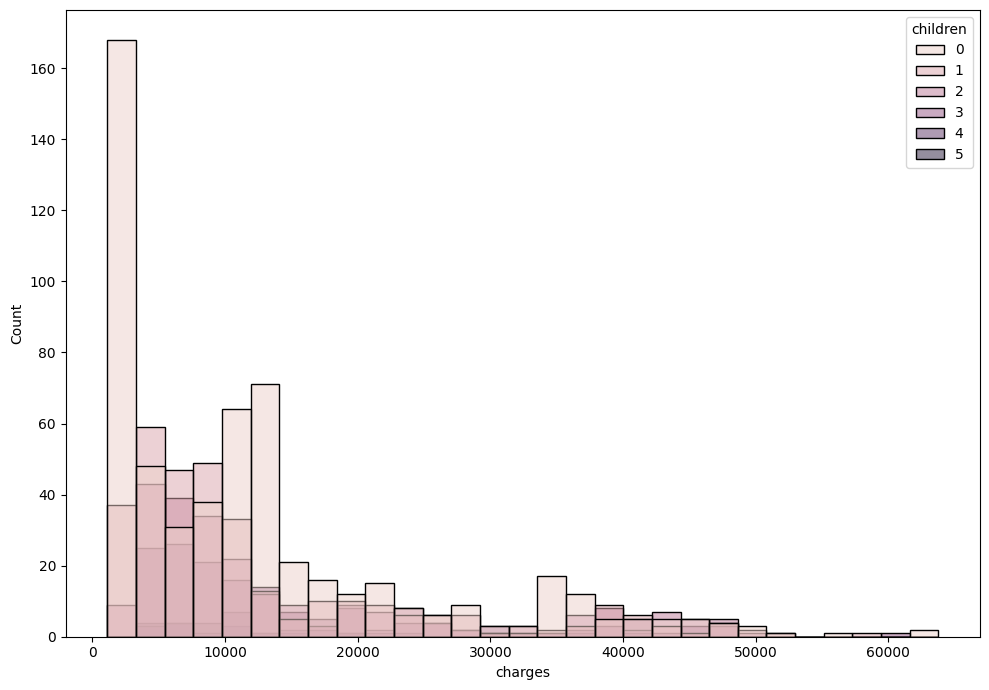

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 1, figsize = (10, 7))

# Crear un histograma

sns.histplot( df, x="charges", hue="children")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

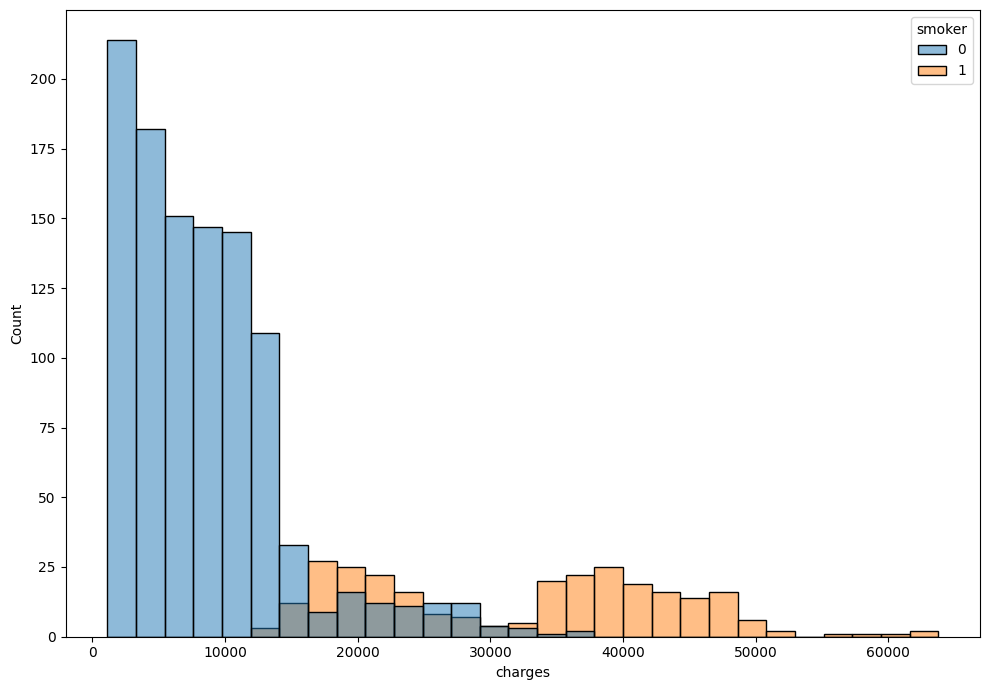

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 1, figsize = (10, 7))

# Crear un histograma múltiple

sns.histplot( df, x="charges", hue="smoker")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

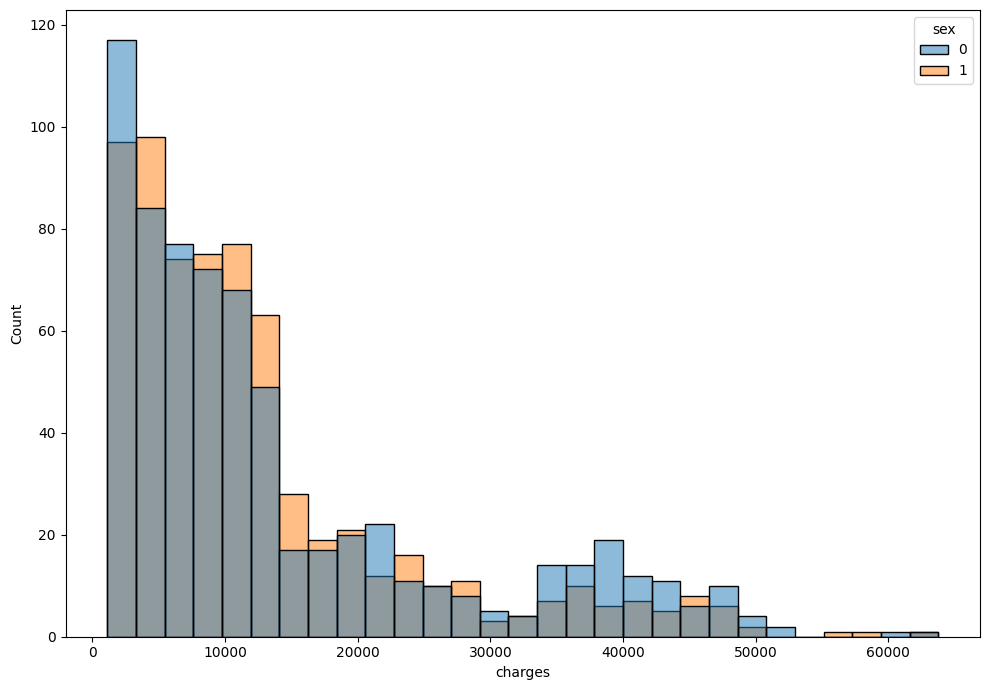

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 1, figsize = (10, 7))

# Crear un histograma múltiple

sns.histplot( df, x="charges", hue="sex")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

<Axes: xlabel='age', ylabel='charges'>

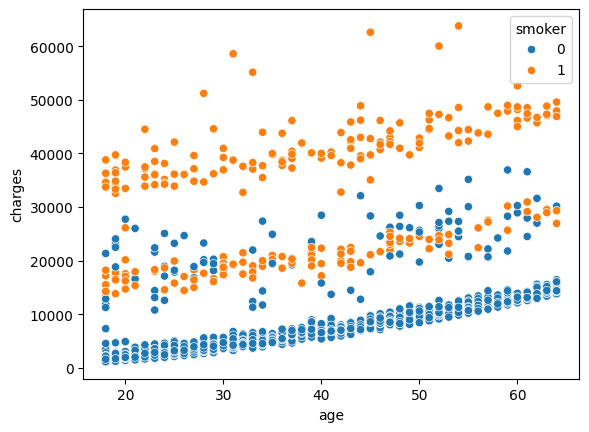

In [114]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

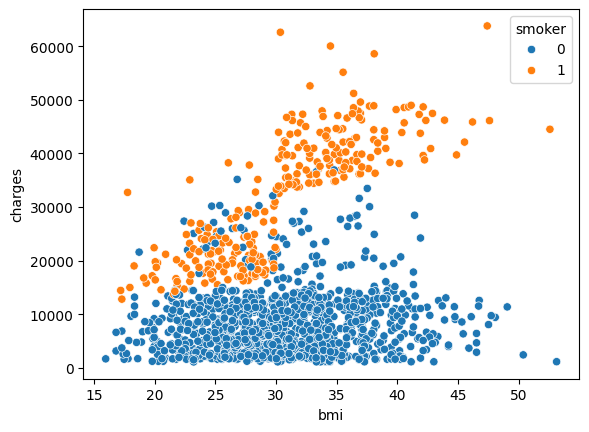

In [115]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

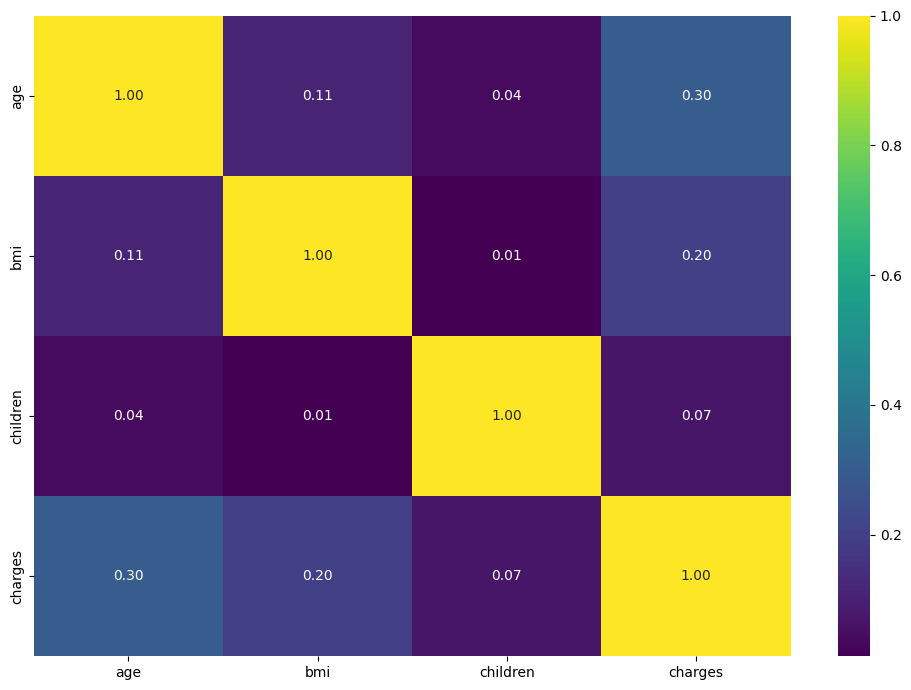

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df[numericals].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()


In [117]:
numericals = numericals.drop("charges")
numericals

Index(['age', 'bmi', 'children'], dtype='object')

In [118]:
# Min-max scaler

# Factorizar

new_numerical_cols_names = []
for col in categorical:
  df[col+"_n"] = pd.factorize(df[col])[0]
  new_numerical_cols_names.append(col+"_n")

# Extend the numericals Index with the new column names
numericals = numericals.append(pd.Index(new_numerical_cols_names))

df.head()



,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,1,27.900,0,1,0,16884.92400,0,0,0
1,18,0,33.770,1,0,1,1725.55230,1,1,1
2,28,0,33.000,3,0,1,4449.46200,1,1,1
3,33,0,22.705,0,0,2,21984.47061,1,1,2
4,32,0,28.880,0,0,2,3866.85520,1,1,2


In [119]:
numericals

Index(['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n'], dtype='object')

In [120]:
# MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[numericals])
df_scal = pd.DataFrame(scal_features, index = df.index, columns=numericals)
df_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,0.021739,0.321227,0.0,0.0,0.0,0.000000
1,0.000000,0.479150,0.2,1.0,1.0,0.333333
2,0.217391,0.458434,0.6,1.0,1.0,0.333333
3,0.326087,0.181464,0.0,1.0,1.0,0.666667
4,0.304348,0.347592,0.0,1.0,1.0,0.666667


In [122]:
from re import X
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

X = df_scal
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support(indices=True)
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_train.columns[ix])

X_train_sel.head()


ValueError: Unknown label type: (array([ 5972.378 ,  4561.1885, 42983.4585, ...,  1964.78  ,  7151.092 ,
        5836.5204]),)

In [ ]:
import os

X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

output_dir = "./data/processed"
os.makedirs(output_dir, exist_ok=True)

X_train_sel.to_csv(os.path.join(output_dir, "clean_train.csv"), index = False)
X_test_sel.to_csv(os.path.join(output_dir, "clean_test.csv"), index = False)